In [29]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
data = pd.read_excel('data/catering_sale.xls', index_col=u'日期')
data.describe()

E:\Anaconda\lib\site-packages\numpy\lib\function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,销量
count,200.000000
mean,2755.214700
std,751.029772
min,22.000000
25%,NaN
50%,NaN
75%,NaN
max,9106.440000


>出现警告并且没有百分位的统计值，是因为现在的pandas.DataFrame.describe计算过程不再排除空值，所以出现这种结果就意味数据中存在空值。

TypeError: 'Series' object is not callable

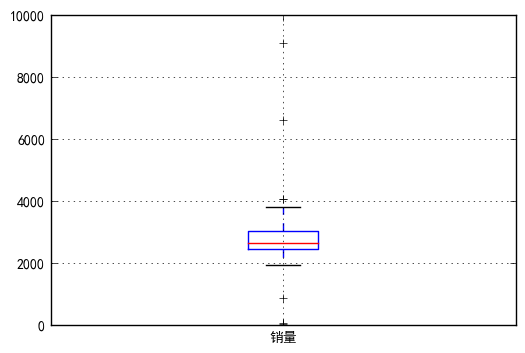

In [33]:
data = pd.read_excel('data/catering_sale.xls', index_col=u'日期')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

plt.figure()
p = data.boxplot(return_type='dict')    #箱线图
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()

#使用annotate添加注释
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i], xy = (x[i], y[i]), xytext=(x[i]+0.05 - 0.8 / (y[i]- y[i-1]), y[i]))
    else:
        plt.annotate(y[i], xy = (x[i], y[i]), xytext = (x[i] + 0.08, y[i]))
plt.show()

## 在boxplot()方法中设置参数return_type不然会有警告，新版的boxplot提供多种返回类型，有axes、dict、both,详细描述查看文档。

In [34]:
# 按照400到5000，筛选数据。
filter_data  = data[(data.销量 > 400) & (data.销量 < 5000)]

In [35]:
filter_data.sort_index(0).head()

,销量
日期,
2014-08-02,2261.7
2014-08-03,3436.4
2014-08-04,2993.0
2014-08-05,2618.1
2014-08-06,2915.8


# 使用以上数据做频率分布

In [36]:
# 极差
range = filter_data.max() - filter_data.min()

In [37]:
# 基本统计量
statistics = filter_data.describe()
statistics

,销量
count,195.000000
mean,2744.595385
std,424.739407
min,865.000000
25%,2460.600000
50%,2655.900000
75%,3023.200000
max,4065.200000


In [38]:
statistics.loc['range'] = statistics.loc['max'] - statistics.loc['min'] #极差
statistics.loc['var'] = statistics.loc['std'] / statistics.loc['mean'] #变异系数
statistics.loc['dis'] = statistics.loc['75%'] - statistics.loc['25%'] #四分位数间距
print(statistics)

                销量
count   195.000000
mean   2744.595385
std     424.739407
min     865.000000
25%    2460.600000
50%    2655.900000
75%    3023.200000
max    4065.200000
range  3200.200000
var       0.154755
dis     562.600000
